In [ ]:
!pip install --ignore-installed --upgrade tensorflow #if not

In [2]:
# !pip install tensorflow-gpu==1.10.0

In [3]:
!pip install matplotlib

  Using cached https://files.pythonhosted.org/packages/da/83/d989ee20c78117c737ab40e0318ea221f1aed4e3f5a40b4f93541b369b93/matplotlib-3.1.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/dd/d9/3ec19e966301a6e25769976999bd7bbe552016f0d32b577dc9d63d2e0c49/pyparsing-2.4.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f8/a1/5742b56282449b1c0968197f63eae486eca2c35dcd334bab75ad524e0de1/kiwisolver-1.1.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
ERROR: object-detection 0.1 requires Cython>=0.28.1, which is not installed.
ERROR: object-detection 0.1 requires Pillow>=1.0, which is not installed.


In [7]:
!pip install Pillow

  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 2.0MB 42kB/s ta 0:00:011


In [10]:
 !pip install pillow

  Using cached https://files.pythonhosted.org/packages/b6/4b/5adc1109908266554fb978154c797c7d71aba43dd15508d8c1565648f6bc/Pillow-6.0.0-cp27-cp27mu-manylinux1_x86_64.whl


In [1]:
import tensorflow as tf
tf.__version__

'1.10.0'

In [39]:
!pip install pillow
!pip install lxml

  Using cached https://files.pythonhosted.org/packages/b6/4b/5adc1109908266554fb978154c797c7d71aba43dd15508d8c1565648f6bc/Pillow-6.0.0-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/af/31/47cce58942bbf4b8f1c975ec2d1ab52141f7b7cf8cdecb58f25546d2c4fd/lxml-4.3.4-cp27-cp27mu-manylinux1_x86_64.whl


In [33]:
# !pip uninstall -y Pillow
# !pip uninstall -y PIL
# !pip install  Pillow

In [42]:
!pip install Pillow

  Using cached https://files.pythonhosted.org/packages/b6/4b/5adc1109908266554fb978154c797c7d71aba43dd15508d8c1565648f6bc/Pillow-6.0.0-cp27-cp27mu-manylinux1_x86_64.whl


In [43]:
!pip list

DEPRECATION: The default format will switch to columns in the future. You can use --format=(legacy|columns) (or define a format=(legacy|columns) in your pip.conf under the [list] section) to disable this warning.
asn1crypto (0.24.0)
beautifulsoup4 (4.6.0)
chardet (3.0.4)
cryptography (2.1.4)
enum34 (1.1.6)
html5lib (0.999999999)
idna (2.6)
ipaddress (1.0.17)
keyring (10.6.0)
keyrings.alt (3.0)
lxml (4.3.4)
object-detection (0.1)
olefile (0.45.1)
Pillow (6.0.0)
pip (9.0.1)
pycrypto (2.6.1)
pygobject (3.26.1)
pyxdg (0.25)
SecretStorage (2.3.1)
setuptools (39.0.1)
six (1.11.0)
webencodings (0.5)
wheel (0.30.0)


In [3]:

import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
# from imaging import Image

# # This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

In [18]:
# This is needed to display the images.
%matplotlib inline

## Object detection imports

Here are the imports from the object detection module.


In [4]:
from utils import label_map_util

from utils import visualization_utils as vis_util

In [5]:
MODEL_NAME = 'M_Reding/'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('training', 'label_map.pbtxt')

NUM_CLASSES = 10

## Load a (frozen) Tensorflow model into memory.

In [6]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

## Loading label map

Label maps map indices to category names, so that when our convolution network predicts 5, we know that this corresponds to airplane. Here we use internal utility functions, but anything that returns a dictionary mapping integers to appropriate string labels would be fine


In [7]:
PATH_TO_LABELS="training/label_map.pbtxt"
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

In [8]:
# For the sake of simplicity we will use only 2 images:
# image1.jpg
# image2.jpg
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = '/home/paritoshyadav/Desktop/car'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(1, 40) ]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

In [9]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

## Run for singel Image

In [10]:
def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[0], image.shape[1])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: np.expand_dims(image, 0)})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.uint8)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict

In [20]:
######


def Process(ImgPath):
    image = Image.open(IMGAGE_PATH)
    image_np = load_image_into_numpy_array(image)
      # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)
    # Actual detection.
    output_dict = run_inference_for_single_image(image_np, detection_graph)
    # Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(
                                                      image_np,
                                                      output_dict['detection_boxes'],
                                                      output_dict['detection_classes'],
                                                      output_dict['detection_scores'],
                                                      category_index,
                                                      instance_masks=output_dict.get('detection_masks'),
                                                      use_normalized_coordinates=True,
                                                      line_thickness=5)
    plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(image_np)
  
    # print(category_index)
    # print("Class = %s" %output_dict['detection_classes'].max())
    # print("score = %s" %output_dict["detection_scores"].max())
    print("Confidence = ",output_dict["detection_scores"].max())
    return output_dict
# category_index,output_dict.get('detection_masks'),output_dict['detection_classes']
# output_dict["detection_scores"]

Confidence =  0.9945958


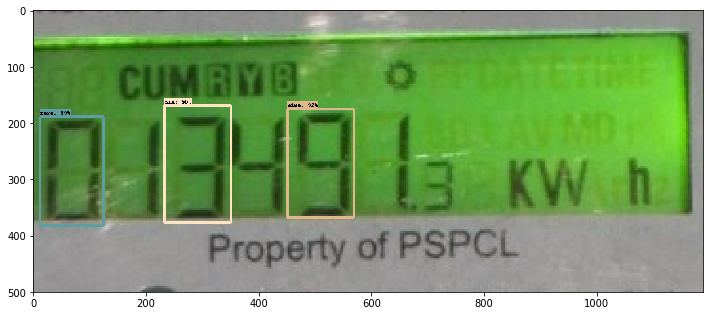

In [22]:
# before Damage
IMGAGE_PATH = "images/test/75.jpg"
ab=Process(IMGAGE_PATH)

In [27]:
ab.keys()

dict_keys(['num_detections', 'detection_boxes', 'detection_scores', 'detection_classes'])

In [78]:
PATH_TO_TEST_IMAGES_DIR = '/home/paritoshyadav/Desktop/'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'img{}.jpg'.format(i)) for i in range(1, 5) ]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

In [43]:
for image_path in TEST_IMAGE_PATHS:
    image = Image.open(image_path)
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
    image_np = load_image_into_numpy_array(image)
    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)
    # Actual detection.
    output_dict = run_inference_for_single_image(image_np, detection_graph)
    # Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=8)
    plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(image_np)
    print("Damage Percentage = ",output_dict["detection_scores"].max())